<a href="https://colab.research.google.com/github/kuretaru/topo-ml-spin-phases/blob/develop/materials/lessons/2_1_Topological_Data_Analysis_(The_Core)_Cubical_Complexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base imports

In [3]:
!pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

# Theory and Algorithm

Goal: We want to teach the computer to see "holes" and "islands" in your spin patterns.

Installation

You need a TDA library. We will use Gudhi (it's standard and fast).

**Cubical Complexes**

Concept:
Your lattice is a grid of pixels. In TDA, we treat this as a "Cubical Complex".

    Imagine the lattice as a landscape.

    We filter the pixels by their values.

    We look for:
        H_0​ features: Connected components (Islands).
        H_1 features: Loops (Holes / Rings).

The Hypothesis:

    Cold (Ordered): One giant island (H0) and almost no holes (H1).

    Hot (Disordered): Many small islands and many small holes.

Code Example (How to use Gudhi)

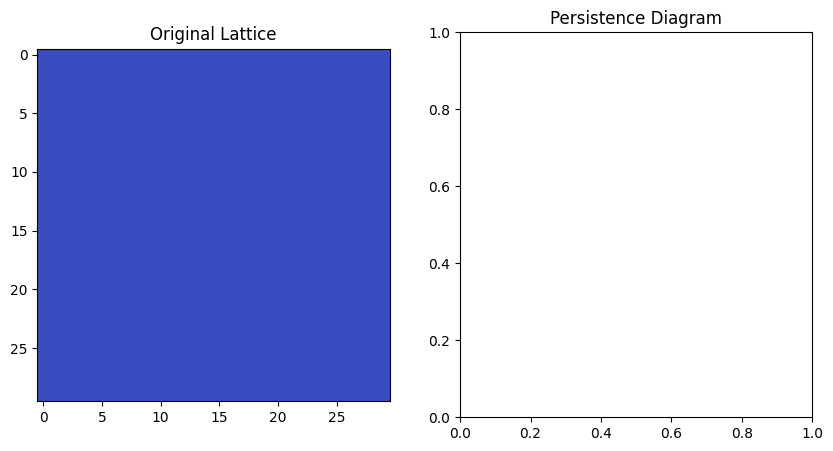

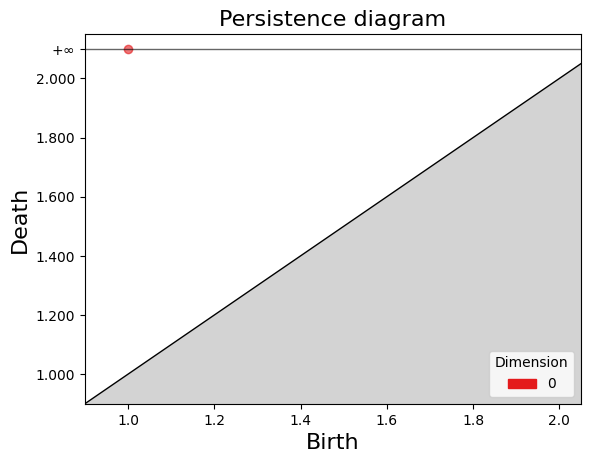

In [10]:
X = np.load('data_x.npy')
y = np.load('data_y.npy')

idx = 0 #@param {type:"integer"}
idx = abs(idx)

sample_lattice = X[idx]

# Build the Cubical Complex
# We treat the lattice values as "heights"
cc = gudhi.CubicalComplex(dimensions=sample_lattice.shape,
                          top_dimensional_cells=sample_lattice.flatten())

# Finds all topological features
persistence = cc.persistence()

# Visualize the Diagram
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Lattice")
plt.imshow(sample_lattice, cmap='coolwarm')

plt.subplot(1, 2, 2)
plt.title("Persistence Diagram")
gudhi.plot_persistence_diagram(persistence) # Gudhi's built-in plotter
plt.show()

Task 1: Generate the Diagram
Run the code above for:

    A Cold sample (X[0]).

    A Hot sample (X[-1] or X[99]).



Answer:
I ran. My investigations:
```
X[0]:
- Original Lattice simply dublicates its Latice.
- Persistence diagram is above linear graph, which means its feature is a simple feature (non-degenerative, if I understood docs correctly).
- Feature have a dot in the (+\infinity, 1.0)
X[99]:
- Original Lattice simply dublicates its Latice.
- Persistence diagram is above linear graph, which means its feature is a simple feature (non-degenerative, if I understood docs correctly).
- Feature have two dots and two dimensions (0 and 1): (1000, -1.0) and (+\infinity, -1.0)
```

Task 2: Interpretation (Write in comments)
Look at the Persistence Diagram (the plot with red and blue dots).

    The X-axis is "Birth" (when a hole appears).

    The Y-axis is "Death" (when a hole disappears).

    Points near the diagonal line are "noise" (short-lived).

    Points far from the diagonal are "significant features".

Question: Compare the diagram of the Cold sample vs. the Hot sample.

    Which one has more points (dots)?

    Which one has points farther from the diagonal?

Answer: Given with info from 1st assignment, I can tell, that Hot one has more dots.
And analysing my data, I suppose cold has a bigger distance on y axis on average. But it might be equal as well, so I think, somewhere is a mistake.